# ML Assignment: Self Organizing Maps 

## Prepare the Tools

###### *) This is my last checkpoint with the most optimum result. If you restart and run the notebook, the result will be different.

In [ ]:
from matplotlib import pyplot as plt
from operator import sub

import seaborn as sns
import pandas as pd
import numpy as np
import random

## The Dataset

Given atributtes x and y with float datatype

In [34]:
colnames = ['x','y']
my_data = pd.read_csv('Dataset.csv', names = colnames, header=None)
my_data.head()

,x,y
0,9.802,10.132
1,10.350,9.768
2,10.098,9.988
3,9.730,9.910
4,9.754,10.430


In [35]:
my_data.describe()

,x,y
count,600.000000,600.000000
mean,9.997540,9.979520
std,3.266002,3.264521
min,3.402000,3.178000
25%,8.287500,8.057000
50%,9.664000,9.979000
75%,11.883500,11.851500
max,17.124000,17.012000


## Normalize the Dataset

scale the dataset using maxminscaller manually

In [4]:
dataset = (my_data - my_data.mean()) / (my_data.max() - my_data.min())
dataset.head()

,x,y
0,-0.014250,0.011022
1,0.025686,-0.015290
2,0.007321,0.000613
3,-0.019497,-0.005025
4,-0.017748,0.032563


## Data  Visualization

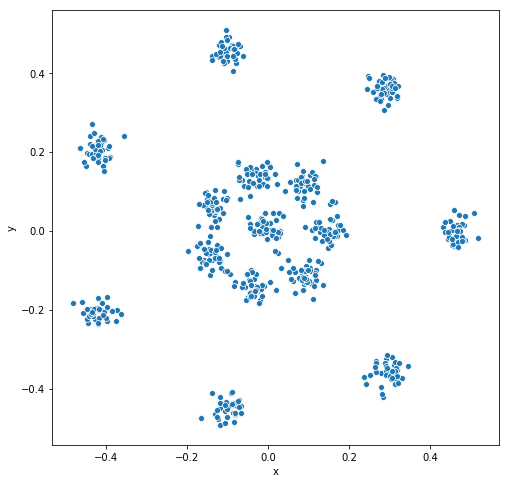

In [5]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="x", y="y", data=dataset)

## Parameters

### Initialize Neuron

initialize 1500 neuron with random value between -0.5 and 0.5 (continue).

In [ ]:
neuron = []
for i in range(1500):
    weight = np.random.uniform(-0.5,0.5,2)
    neuron.append(weight)

In [7]:
my_neurons = pd.DataFrame(neuron,columns =['w1', 'w2'])
print(my_neurons.isna().sum())
my_neurons.head()

w1    0
w2    0
dtype: int64


,w1,w2
0,0.452875,0.291279
1,-0.478619,-0.394771
2,0.157128,-0.283453
3,0.411541,-0.131122
4,0.236096,-0.094909


visualization after we initialize 1500 neuron

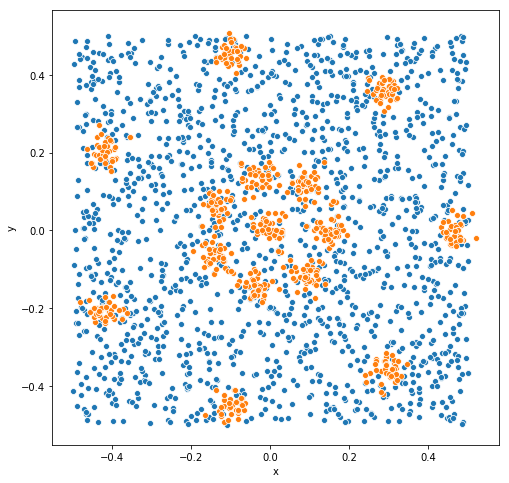

In [8]:
plt.figure(figsize=(8,8))

sns.scatterplot(x="w1", y="w2", data=my_neurons)
sns.scatterplot(x="x", y="y", data=dataset)

### Neighbourhood Function

using gaussian and euclidean function for neighbourhood function

In [ ]:
def gaussian(jarak, sigma):
    return np.exp(-(float(jarak)**2)/(2*(sigma)**2))

In [ ]:
def euclidean(a, b):
    sum = 0
    for i in range(len(a)):
        sum += (a[i]-b[i])**2
    return np.sqrt(sum)

### Learning Rate Params

In [ ]:
n_rate = 0.1
t_n = 2

### Neighbour Params

In [ ]:
sigma = 2
t_sigma = 2

## SOM Process

In [ ]:
best = []

for iterasi in range(40):
    i = np.random.randint(600, size=1)[0]
    data = dataset.iloc[i]
  
    jarak_data_neuron = []
    neighbours = []

    for j in range(len(my_neurons)):
        neuron = my_neurons.iloc[j]
        jarak_data_neuron.append(euclidean(data, neuron))
    
    idx_neuron_terpilih = np.argmin(jarak_data_neuron)
    neuron_terpilih = my_neurons.iloc[idx_neuron_terpilih]
  
    if idx_neuron_terpilih not in best: best.append(idx_neuron_terpilih)
  
    for k in range(len(my_neurons)):
        if (euclidean(my_neurons.iloc[k], neuron_terpilih)) <= sigma: neighbours.append(k)
      
    for item in neighbours:
        neuron = my_neurons.iloc[item]
        jarak_antar_neuron = euclidean(neuron, neuron_terpilih)
        T = n_rate * gaussian(jarak_antar_neuron, sigma)
        delta_neuron = [x * T for x in list(map(sub, data, neuron))]
        my_neurons.iloc[item] = neuron + delta_neuron
  
    sigma = sigma * np.exp(-iterasi/t_sigma)
    n_rate = n_rate * np.exp(-iterasi/t_n)

## Get the Best Neurons

### Best Neurons

In [14]:
best_node = my_neurons.iloc[best]
best_node.T

,1090,470,1440,1264,143,397,760,1091,206,201,...,1387,313,529,63,1094,675,1267,1203,332,980
w1,-0.132094,0.125255,-0.120396,0.008836,-0.105365,-0.011265,0.118829,0.108671,0.280585,-0.379849,...,0.017892,0.091152,-0.157011,-0.099814,-0.090316,0.078828,0.041962,-0.048400,0.262446,0.162044
w2,-0.100221,-0.005321,-0.047035,0.005013,-0.072927,0.132810,0.127937,-0.127807,0.339045,-0.189936,...,0.146932,-0.157312,0.068892,0.110999,-0.387705,0.125166,-0.108851,0.146648,-0.346865,-0.003925


### Drop Best Neurons That are Very Close Together

In [ ]:
i = 0
while i < len(best_node):
    node = best_node.iloc[i]
    idx = 0
  
    while idx < len(best_node):
        a_node = best_node.iloc[idx]
        jarak = euclidean(node, a_node)
    
        if idx != i and jarak < 0.1: best_node = best_node.drop(best_node.index[idx])
      
        idx += 1
    i += 1

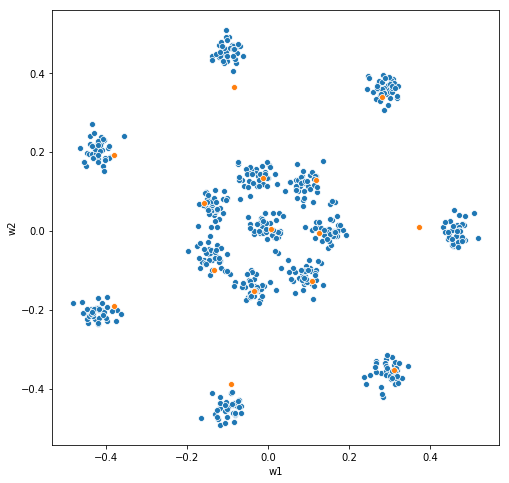

In [17]:
plt.figure(figsize=(8,8))

sns.scatterplot(x="x", y="y", data=dataset)
sns.scatterplot(x="w1", y="w2", data=best_node)

## Clustering

### Clustering Process

In [ ]:
my_data['cluster'] = 0
for i in range(len(dataset)):
    da = dataset.iloc[i]
    candidate = []
  
    for j in range(len(best_node)):
        node = best_node.iloc[j]
        candidate.append(euclidean(node, da))
    
    win = np.argmin(candidate)
    my_data.at[i,'cluster'] = win

### Number of Cluster

In [40]:
len_cluster = len(set(my_data['cluster']))
print('Number of cluster: ' + str(len_cluster))

Number of cluster: 15


### Clustering Result

In [38]:
my_data.head()

,x,y,cluster
0,9.802,10.132,2
1,10.350,9.768,2
2,10.098,9.988,2
3,9.730,9.910,2
4,9.754,10.430,2


### Clustering Visualization

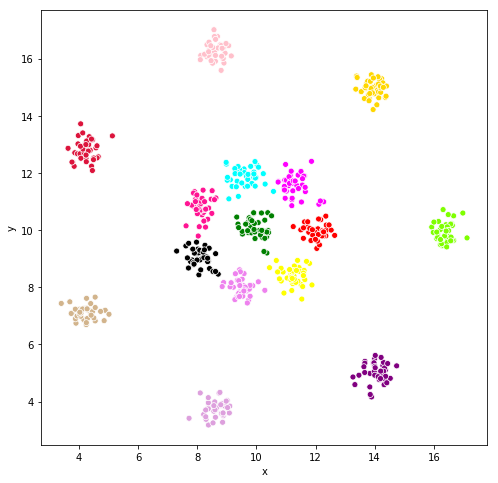

In [39]:
clr = ['black', 'red', 'green', 'cyan', 'magenta', 'yellow', 'gold', 'tan', 'chartreuse', 'violet', 'crimson', 'pink', 'purple', 'deeppink', 'plum', 'brown', 'chocolate', 'darkseagreen', 'lime', 'maroon', 'grey', 'olive', 'tomato', 'salmon', 'greenyellow', 'darkslateblue', 'indigo', 'khaki', 'darkorange']
color = clr[:len_cluster]

plt.figure(figsize=(8,8))

sns.scatterplot(x="x", y="y", hue='cluster', data=my_data, palette=color,legend=False)